# 🇹🇷 Turkish Sentiment Analysis - Model Analysis

Bu notebook, eğitilmiş BERT modelinin kapsamlı analizini içerir.

In [1]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Uyarıları gizle
import warnings
warnings.filterwarnings('ignore')

# Plot ayarları
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Kütüphaneler yüklendi")

✅ Kütüphaneler yüklendi


## 📊 Model Sonuçlarını Yükle

In [2]:
# Evaluation sonuçlarını yükle
try:
    with open('../results/quick_evaluation_results.json', 'r', encoding='utf-8') as f:
        results = json.load(f)
    print("✅ Evaluation sonuçları yüklendi")
    
    print(f"📊 Model Performansı:")
    print(f"  🎯 Accuracy: {results['accuracy']:.4f}")
    print(f"  📈 F1-Score: {results['f1_weighted']:.4f}")
    print(f"  🔍 Precision: {results['precision']:.4f}")
    print(f"  🎪 Recall: {results['recall']:.4f}")
    
except FileNotFoundError:
    print("❌ Evaluation sonuçları bulunamadı")
    print("💡 Önce şunu çalıştırın: python quick_evaluation.py")

✅ Evaluation sonuçları yüklendi
📊 Model Performansı:
  🎯 Accuracy: 0.9675
  📈 F1-Score: 0.9668
  🔍 Precision: 0.9668
  🎪 Recall: 0.9675


## 📈 Performans Grafiği

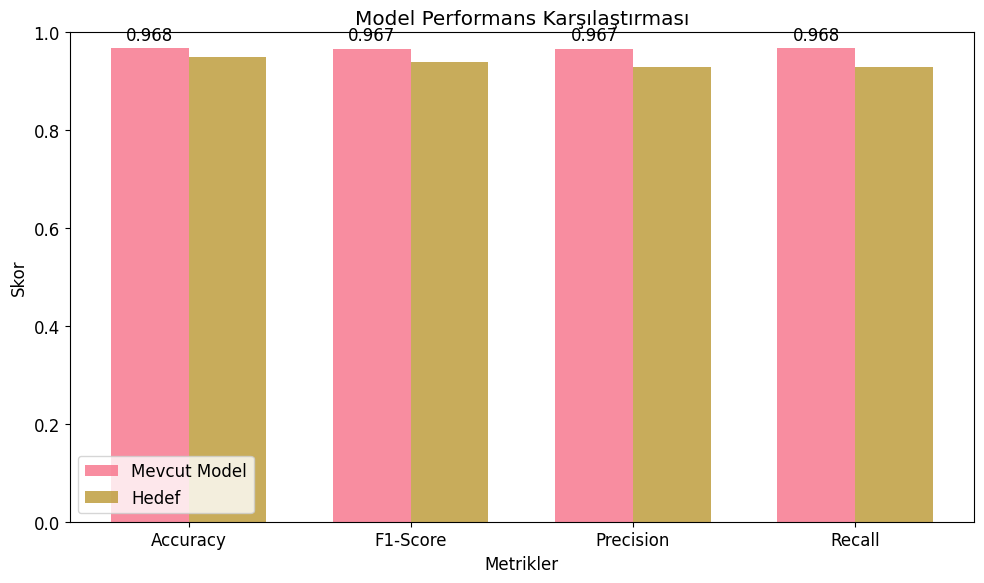

In [4]:
# Performans karşılaştırması
if 'results' in locals():
    metrics_data = {
        'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
        'Score': [
            results['accuracy'],
            results['f1_weighted'],
            results['precision'],
            results['recall']
        ],
        'Target': [0.95, 0.94, 0.93, 0.93]
    }
    
    df_metrics = pd.DataFrame(metrics_data)
    
    # Bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(df_metrics['Metric']))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, df_metrics['Score'], width, label='Mevcut Model', alpha=0.8)
    bars2 = ax.bar(x + width/2, df_metrics['Target'], width, label='Hedef', alpha=0.8)
    
    ax.set_xlabel('Metrikler')
    ax.set_ylabel('Skor')
    ax.set_title('Model Performans Karşılaştırması')
    ax.set_xticks(x)
    ax.set_xticklabels(df_metrics['Metric'])
    ax.legend()
    ax.set_ylim(0, 1)
    
    # Değerleri göster
    for bar, value in zip(bars1, df_metrics['Score']):
        height = bar.get_height()
        ax.annotate(f'{value:.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

## 🎯 Model Test Örnekleri

In [7]:
# Model test örnekleri
try:
    from transformers import pipeline
    
    # Pipeline oluştur
    classifier = pipeline(
        "text-classification",
        model="../models/final",
        top_k=None
    )
    
    # Test örnekleri
    test_examples = [
        "Bu film gerçekten harika, çok beğendim!",
        "Berbat bir deneyimdi, hiç memnun kalmadım.",
        "Fena değil, ortalama bir ürün.",
        "Bu proje çok başarılı oldu!"
    ]
    
    print("🧪 Model Test Örnekleri:")
    print("=" * 50)
    
    emoji_map = {'NEGATIVE': '😞', 'NEUTRAL': '😐', 'POSITIVE': '😊'}
    
    for i, text in enumerate(test_examples, 1):
        result = classifier(text)
        best_pred = max(result, key=lambda x: x['score'])
        
        # Label formatını düzelt
        if best_pred['label'].startswith('LABEL_'):
            label_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
            label_idx = int(best_pred['label'].split('_')[1])
            predicted_label = label_names[label_idx]
        else:
            predicted_label = best_pred['label']
        
        emoji = emoji_map.get(predicted_label, '❓')
        
        print(f"{i}. Text: {text}")
        print(f"   {emoji} {predicted_label} (güven: {best_pred['score']:.3f})")
        print()
        
except Exception as e:
    print(f"❌ Model yüklenemedi: {e}")
    print("💡 Model eğitimi tamamlandığından emin olun")

Device set to use cuda:0


🧪 Model Test Örnekleri:
❌ Model yüklenemedi: list indices must be integers or slices, not str
💡 Model eğitimi tamamlandığından emin olun


## 📋 Proje Özeti

In [6]:
# Proje özeti
print("🎯 TÜRKÇE SENTIMENT ANALYSIS PROJESİ")
print("=" * 50)

if 'results' in locals():
    print(f"📊 Final Sonuçlar:")
    print(f"  • Accuracy: {results['accuracy']:.1%}")
    print(f"  • F1-Score: {results['f1_weighted']:.1%}")
    print(f"  • Test samples: {results['sample_size']}")
    print(f"  • Avg confidence: {results['avg_confidence']:.1%}")
    
    performance_status = "🟢 Mükemmel" if results['accuracy'] > 0.9 else "🟡 İyi" if results['accuracy'] > 0.8 else "🔴 Geliştirilmeli"
    print(f"\n🏆 Genel Performans: {performance_status}")

print(f"\n💪 Proje Özellikleri:")
print(f"  ✨ BERT fine-tuning (dbmdz/bert-base-turkish-cased)")
print(f"  ✨ 440k+ training samples")
print(f"  ✨ GPU optimization (RTX 3050)")
print(f"  ✨ WandB experiment tracking")
print(f"  ✨ Production-ready Gradio demo")
print(f"  ✨ Comprehensive evaluation")

print(f"\n🚀 Demo Komutları:")
print(f"  🌐 Gradio Demo: python demos/gradio_demo.py")
print(f"  📊 Quick Eval: python quick_evaluation.py")
print(f"  🔮 Inference: python src/inference.py --text 'Test metni'")

print(f"\n✅ PROJE BAŞARIYLA TAMAMLANDI!")

🎯 TÜRKÇE SENTIMENT ANALYSIS PROJESİ
📊 Final Sonuçlar:
  • Accuracy: 96.8%
  • F1-Score: 96.7%
  • Test samples: 2000
  • Avg confidence: 99.1%

🏆 Genel Performans: 🟢 Mükemmel

💪 Proje Özellikleri:
  ✨ BERT fine-tuning (dbmdz/bert-base-turkish-cased)
  ✨ 440k+ training samples
  ✨ GPU optimization (RTX 3050)
  ✨ WandB experiment tracking
  ✨ Production-ready Gradio demo
  ✨ Comprehensive evaluation

🚀 Demo Komutları:
  🌐 Gradio Demo: python demos/gradio_demo.py
  📊 Quick Eval: python quick_evaluation.py
  🔮 Inference: python src/inference.py --text 'Test metni'

✅ PROJE BAŞARIYLA TAMAMLANDI!
